# Classifying Hardware Images Using CNN's

There are hundreds of different types of hardware items, and many of them are not commonly known by most people.  In some cases, the task of locating a needed piece of hardware can require consulting with several individuals, multiple trips to stores, and a great deal of wasted time.

## Data
The data comes from processing 5,202 images of hardware items.  The images all fall into one of five categories, each with approximately 1,000 images.

Hardware Categories:
1. Cam Connectors
2. Anchor Screws
3. Eye Bolt
4. Extruded U-Bolt
5. Jack Nut

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K

C:\Users\Public\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Grayscale Data from Processed Images

In [2]:
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

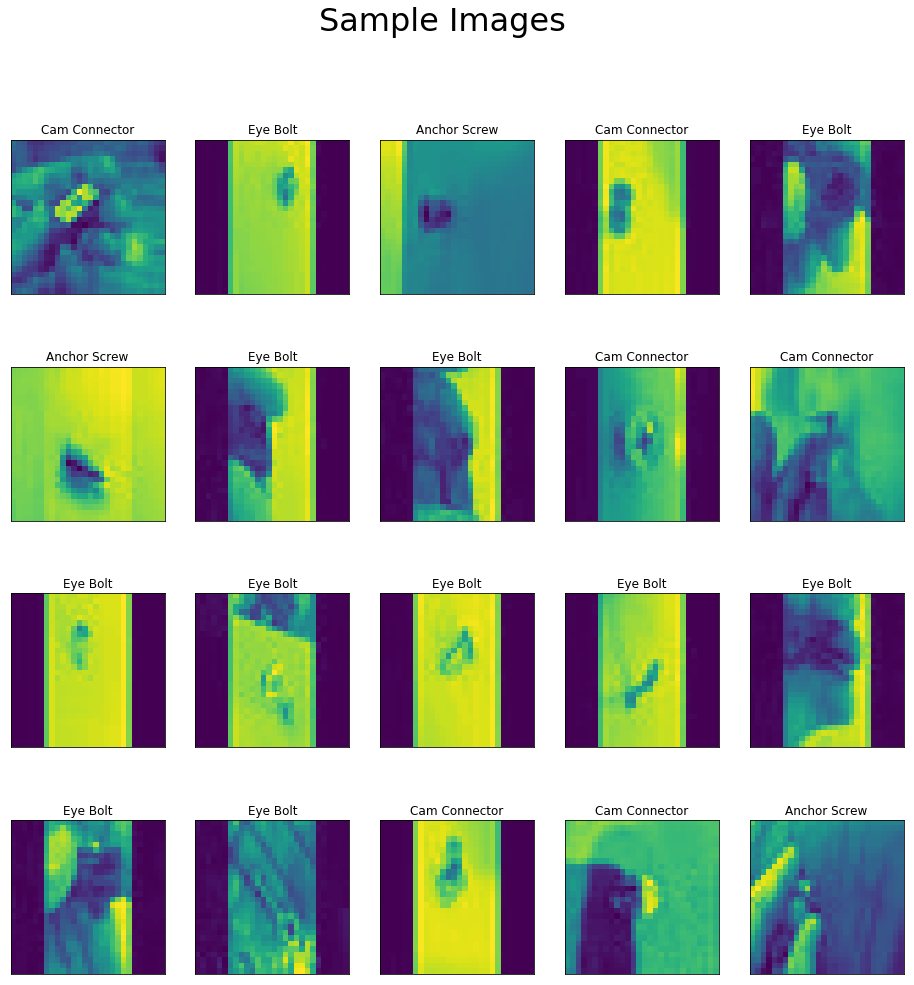

In [3]:
plt.figure(figsize=(16, 16))
for i in np.arange(20):
    plt.subplot(4, 5, i + 1)
    if y_train[i] == 0:
        plt.title('Cam Connector')
    if y_train[i] == 1:
        plt.title('Anchor Screw')
    if y_train[i] == 2:
        plt.title('Eye Bolt')
    if y_train[i] == 3:
        plt.title('Extruded U-Bolt')
    if y_train[i] == 4:
        plt.title('Jack Nut')
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Sample Images', fontsize=32)

plt.show()

In [4]:
X_train

array([[[ 99,  85,  78, ...,  73,  59,  52],
        [ 93,  86,  82, ...,  65,  48,  42],
        [ 83,  88,  86, ...,  64,  42,  32],
        ...,
        [ 52,  49,  59, ..., 131, 136, 127],
        [ 74,  76,  82, ..., 143, 148, 139],
        [ 79,  92, 102, ..., 124, 133, 127]],

       [[  0,   0,   1, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   0,   0],
        ...,
        [  2,   0,   0, ...,   0,   0,   0],
        [  2,   1,   0, ...,   0,   0,   0],
        [  2,   1,   0, ...,   0,   0,   0]],

       [[240, 240, 237, ..., 139, 134, 131],
        [239, 239, 236, ..., 134, 130, 127],
        [237, 237, 234, ..., 129, 125, 123],
        ...,
        [195, 194, 199, ..., 109, 107, 106],
        [196, 195, 198, ..., 109, 107, 106],
        [197, 196, 198, ..., 109, 107, 106]],

       ...,

       [[194, 195, 195, ..., 190, 192, 194],
        [195, 195, 196, ..., 191, 193, 195],
        [196, 196, 197, ..., 192, 195, 197

In [5]:
X_train = X_train.reshape(4161, 784)
X_test = X_test.reshape(1041, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [6]:
# Convert class vectors to binary class matrices
# So instead of one column with 10 values, create 10 binary columns
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

# Multi-Layer Perceptron

In [7]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(64, activation='relu', input_shape=(784,)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(3, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 54,595
Trainable params: 54,595
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=70,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 4161 samples, validate on 1041 samples
Epoch 1/70
4161/4161 [==============================] - 1s 142us/step - loss: 0.8655 - acc: 0.6732 - val_loss: 0.7826 - val_acc: 0.7166
Epoch 2/70
4161/4161 [==============================] - 0s 40us/step - loss: 0.8027 - acc: 0.7042 - val_loss: 0.7880 - val_acc: 0.7416
Epoch 3/70
4161/4161 [==============================] - 0s 43us/step - loss: 0.7594 - acc: 0.7191 - val_loss: 0.7626 - val_acc: 0.7070
Epoch 4/70
4161/4161 [==============================] - 0s 41us/step - loss: 0.7379 - acc: 0.7275 - val_loss: 0.6714 - val_acc: 0.7541
Epoch 5/70
4161/4161 [==============================] - 0s 43us/step - loss: 0.6991 - acc: 0.7337 - val_loss: 0.7027 - val_acc: 0.7464
Epoch 6/70
4161/4161 [==============================] - 0s 41us/step - loss: 0.6794 - acc: 0.7431 - val_loss: 0.6997 - val_acc: 0.7339
Epoch 7/70
4161/4161 [==============================] - 0s 40us/step - loss: 0.6607 - acc: 0.7419 - val_loss: 0.6140 - val_acc: 0.7656
Epoch 

Epoch 61/70
4161/4161 [==============================] - 0s 52us/step - loss: 0.3531 - acc: 0.8640 - val_loss: 0.4522 - val_acc: 0.8156
Epoch 62/70
4161/4161 [==============================] - 0s 46us/step - loss: 0.3756 - acc: 0.8529 - val_loss: 0.4103 - val_acc: 0.8434
Epoch 63/70
4161/4161 [==============================] - 0s 43us/step - loss: 0.3591 - acc: 0.8582 - val_loss: 0.3607 - val_acc: 0.8511
Epoch 64/70
4161/4161 [==============================] - 0s 41us/step - loss: 0.3634 - acc: 0.8659 - val_loss: 0.4582 - val_acc: 0.8165
Epoch 65/70
4161/4161 [==============================] - 0s 45us/step - loss: 0.3571 - acc: 0.8625 - val_loss: 0.4621 - val_acc: 0.7983
Epoch 66/70
4161/4161 [==============================] - 0s 41us/step - loss: 0.3569 - acc: 0.8678 - val_loss: 0.3098 - val_acc: 0.8809
Epoch 67/70
4161/4161 [==============================] - 0s 39us/step - loss: 0.3501 - acc: 0.8693 - val_loss: 0.3436 - val_acc: 0.8626
Epoch 68/70
4161/4161 [=========================

In [ ]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# CNN Using Grayscale Data

In [9]:
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [11]:
# input image dimensions, from our data
img_rows, img_cols = 28, 28
num_classes = 3


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=70,
          verbose=1,
          validation_data=(X_test, y_test))

X_train shape: (4161, 28, 28, 1)
4161 train samples
1041 test samples
Train on 4161 samples, validate on 1041 samples
Epoch 1/50
4161/4161 [==============================] - 19s 5ms/step - loss: 0.9643 - acc: 0.6087 - val_loss: 0.9476 - val_acc: 0.6196
Epoch 2/50
4161/4161 [==============================] - 19s 4ms/step - loss: 0.9421 - acc: 0.6200 - val_loss: 0.9336 - val_acc: 0.6196
Epoch 3/50
4161/4161 [==============================] - 19s 5ms/step - loss: 0.9377 - acc: 0.6200 - val_loss: 0.9271 - val_acc: 0.6196
Epoch 4/50
4161/4161 [==============================] - 18s 4ms/step - loss: 0.9362 - acc: 0.6200 - val_loss: 0.9283 - val_acc: 0.6196
Epoch 5/50
4161/4161 [==============================] - 19s 5ms/step - loss: 0.9341 - acc: 0.6200 - val_loss: 0.9271 - val_acc: 0.6196
Epoch 6/50
4161/4161 [==============================] - 19s 5ms/step - loss: 0.9342 - acc: 0.6200 - val_loss: 0.9269 - val_acc: 0.6196
Epoch 7/50
4161/4161 [==============================] - 19s 4ms/step - l

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# RGB Data from Processed Images

In [12]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')

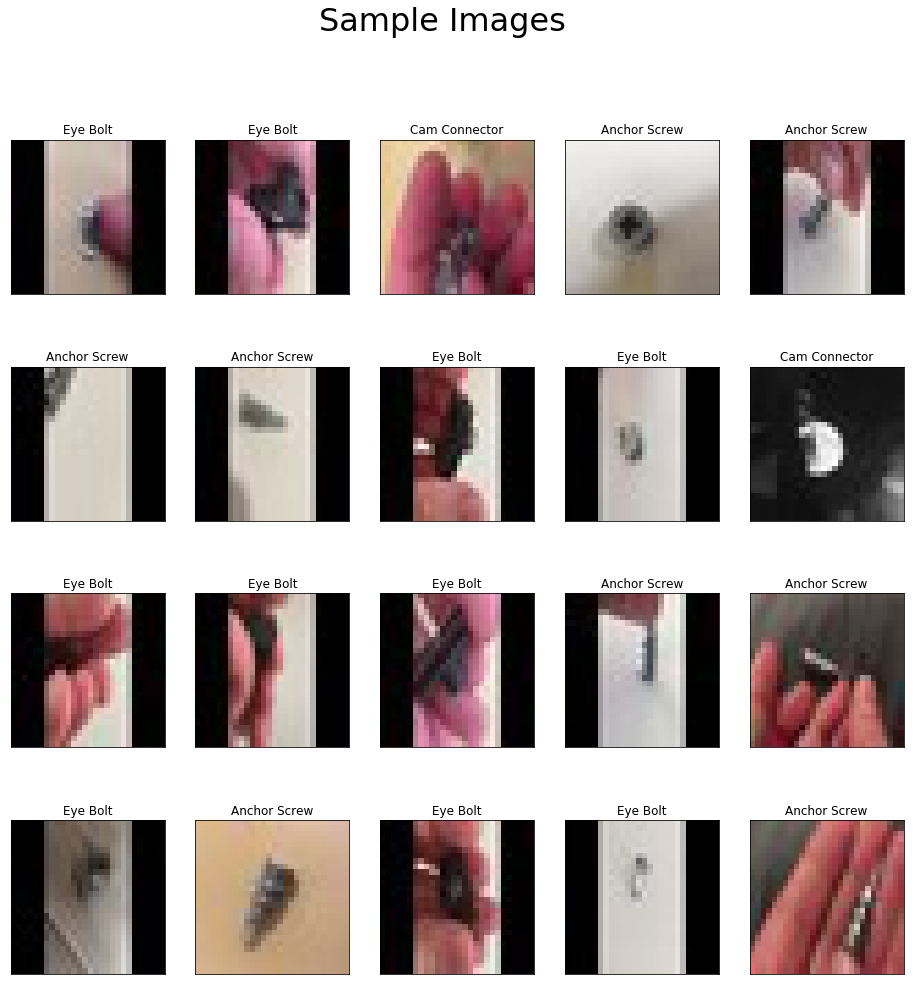

In [13]:
plt.figure(figsize=(16, 16))
for i in np.arange(20):
    plt.subplot(4, 5, i + 1)
    if y_train[i] == 0:
        plt.title('Cam Connector')
    if y_train[i] == 1:
        plt.title('Anchor Screw')
    if y_train[i] == 2:
        plt.title('Eye Bolt')
    if y_train[i] == 3:
        plt.title('Extruded U-Bolt')
    if y_train[i] == 4:
        plt.title('Jack Nut')
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Sample Images', fontsize=32)

plt.show()

In [14]:
val_score = []

# Covolutional Neural Network with RGB Data

In [15]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 3


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

model.fit(X_train, y_train,
            batch_size=128,
            epochs=70,
            verbose=1,
            validation_data=(X_test, y_test))
#score = model.evaluate(X_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
score = model.evaluate(X_val, y_val, verbose=0)
print(score[1])
#val_score.append(score[1])

X_train shape: (3329, 28, 28, 3)
3329 train samples
937 test samples
Train on 3329 samples, validate on 937 samples
Epoch 1/70
3329/3329 [==============================] - 18s 6ms/step - loss: 0.9164 - acc: 0.6410 - val_loss: 1.1423 - val_acc: 0.6425
Epoch 2/70
3329/3329 [==============================] - 18s 5ms/step - loss: 0.8484 - acc: 0.7011 - val_loss: 0.9402 - val_acc: 0.6692
Epoch 3/70
3329/3329 [==============================] - 17s 5ms/step - loss: 0.7648 - acc: 0.7131 - val_loss: 1.6363 - val_acc: 0.6286
Epoch 4/70
3329/3329 [==============================] - 18s 5ms/step - loss: 0.7454 - acc: 0.7315 - val_loss: 1.0613 - val_acc: 0.5240
Epoch 5/70
3329/3329 [==============================] - 18s 6ms/step - loss: 0.7279 - acc: 0.7309 - val_loss: 0.7847 - val_acc: 0.7257
Epoch 6/70
3329/3329 [==============================] - 18s 5ms/step - loss: 0.6685 - acc: 0.7477 - val_loss: 0.6647 - val_acc: 0.7716
Epoch 7/70
3329/3329 [==============================] - 19s 6ms/step - los

3329/3329 [==============================] - 16s 5ms/step - loss: 0.0762 - acc: 0.9763 - val_loss: 0.0840 - val_acc: 0.9712
Epoch 61/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0405 - acc: 0.9895 - val_loss: 0.0665 - val_acc: 0.9744
Epoch 62/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0950 - acc: 0.9694 - val_loss: 0.0764 - val_acc: 0.9755
Epoch 63/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0447 - acc: 0.9868 - val_loss: 0.0701 - val_acc: 0.9765
Epoch 64/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0920 - acc: 0.9697 - val_loss: 0.0671 - val_acc: 0.9776
Epoch 65/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0380 - acc: 0.9898 - val_loss: 0.0571 - val_acc: 0.9776
Epoch 66/70
3329/3329 [==============================] - 15s 5ms/step - loss: 0.0316 - acc: 0.9919 - val_loss: 0.0577 - val_acc: 0.9787
Epoch 67/70
3329/3329 [==============================] - 15s

In [16]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.061677593562720165
Test accuracy: 0.9807692307692307
